# Seleccion del Dataset

Usamos el dataset Breast Cancer Wisconsin (Diagnostic), En español es un dataset de Diagnostico de cancer de mama.

El objetivo es predecir **si un tumor es benigno (B) o maligno (M)** a partir de características numéricas de imágenes de células (radio, textura, área, suavidad, simetría, etc.).

Podemos ver que es un problema de **clasificación binaria**.

Fuente del Dataset: https://www.kaggle.com/datasets/uciml/breast-cancer-wisconsin-data

# Importacion de librerias

In [10]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

# Cargar y explorar datos

In [11]:
# Cargar dataset
df = pd.read_csv("data.csv")

# Ver las primeras filas
print(df.head())

# Información general
print(df.info())

# Revisar distribución de la variable objetivo
print(df['diagnosis'].value_counts())

#La columna diagnosis es la variable objetivo:
#M = Maligno
#B = Benigno


         id diagnosis  radius_mean  texture_mean  perimeter_mean  area_mean  \
0    842302         M        17.99         10.38          122.80     1001.0   
1    842517         M        20.57         17.77          132.90     1326.0   
2  84300903         M        19.69         21.25          130.00     1203.0   
3  84348301         M        11.42         20.38           77.58      386.1   
4  84358402         M        20.29         14.34          135.10     1297.0   

   smoothness_mean  compactness_mean  concavity_mean  concave points_mean  \
0          0.11840           0.27760          0.3001              0.14710   
1          0.08474           0.07864          0.0869              0.07017   
2          0.10960           0.15990          0.1974              0.12790   
3          0.14250           0.28390          0.2414              0.10520   
4          0.10030           0.13280          0.1980              0.10430   

   ...  texture_worst  perimeter_worst  area_worst  smoothness

# Preparar los datos

In [12]:
# Eliminar columnas irrelevantes (ej: id, unnamed)
df = df.drop(columns=['id', 'Unnamed: 32'], errors='ignore')

# Separar variables predictoras y objetivo
X = df.drop(columns=['diagnosis'])
y = df['diagnosis'].map({'M':1, 'B':0})  #Se codifica la variable como 1 = Maligno, 0 = Benigno

# Dividir en train/test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42, stratify=y)

# Escalar datos para KNN
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

Balance entre aprendizaje y evaluación

El modelo necesita muchos datos para entrenar y aprender patrones.

También necesita datos suficientes para evaluar si lo aprendido se generaliza bien.

**70/30 es un punto medio común:**

70%  asegura que el modelo “vea” la mayoría de los casos.

30%  asegura que la evaluación se haga sobre un conjunto representativo

# Modelo K-NN

In [13]:
knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(X_train_scaled, y_train)

y_pred_knn = knn.predict(X_test_scaled)

print("Precisión KNN:", accuracy_score(y_test, y_pred_knn))
print(classification_report(y_test, y_pred_knn))

Precisión KNN: 0.9649122807017544
              precision    recall  f1-score   support

           0       0.95      1.00      0.97       107
           1       1.00      0.91      0.95        64

    accuracy                           0.96       171
   macro avg       0.97      0.95      0.96       171
weighted avg       0.97      0.96      0.96       171



# Modelo Árbol de Decisión

Precisión Árbol de Decisión: 0.9064327485380117
              precision    recall  f1-score   support

           0       0.88      0.98      0.93       107
           1       0.96      0.78      0.86        64

    accuracy                           0.91       171
   macro avg       0.92      0.88      0.90       171
weighted avg       0.91      0.91      0.90       171



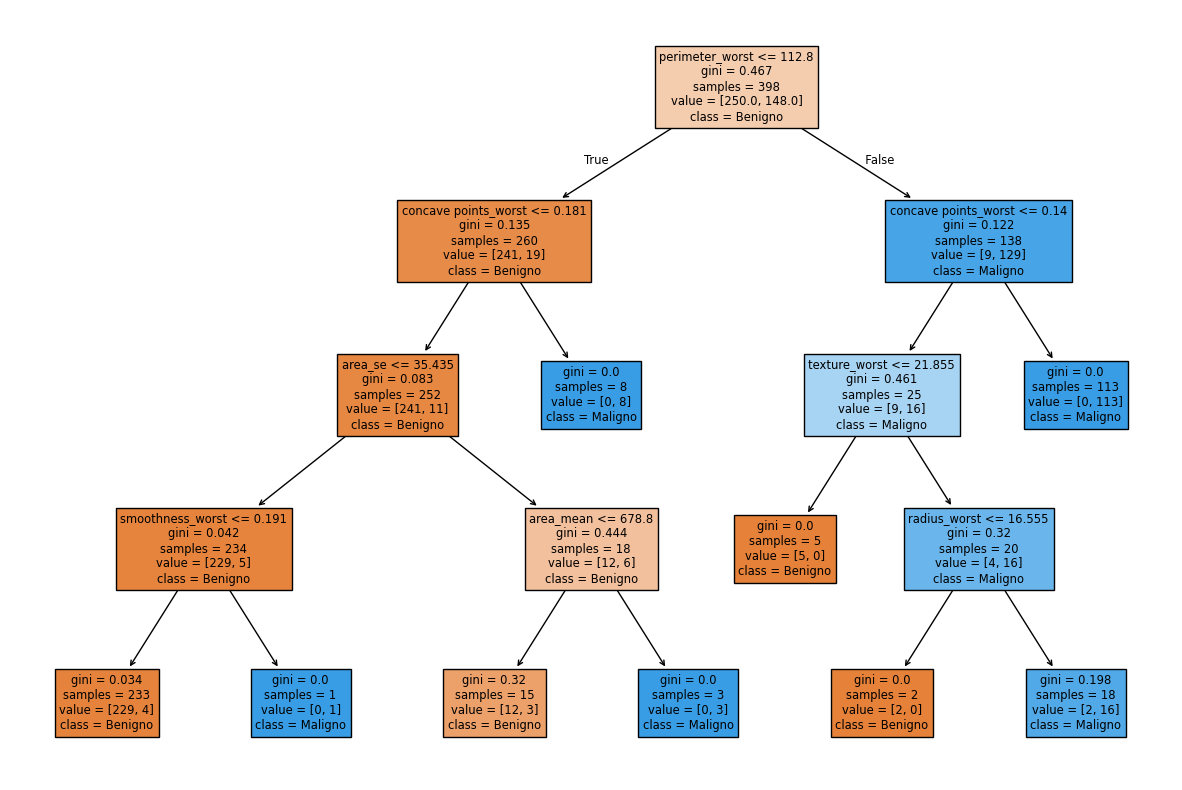

In [14]:
dtree = DecisionTreeClassifier(max_depth=4, random_state=42)
dtree.fit(X_train, y_train)

y_pred_tree = dtree.predict(X_test)

print("Precisión Árbol de Decisión:", accuracy_score(y_test, y_pred_tree))
print(classification_report(y_test, y_pred_tree))

# Visualización del árbol
plt.figure(figsize=(15,10))
plot_tree(dtree, feature_names=X.columns, class_names=['Benigno','Maligno'], filled=True)
plt.show()


# Comparación

Resultados comparativos:
KNN: 0.9649122807017544
Árbol de Decisión: 0.9064327485380117


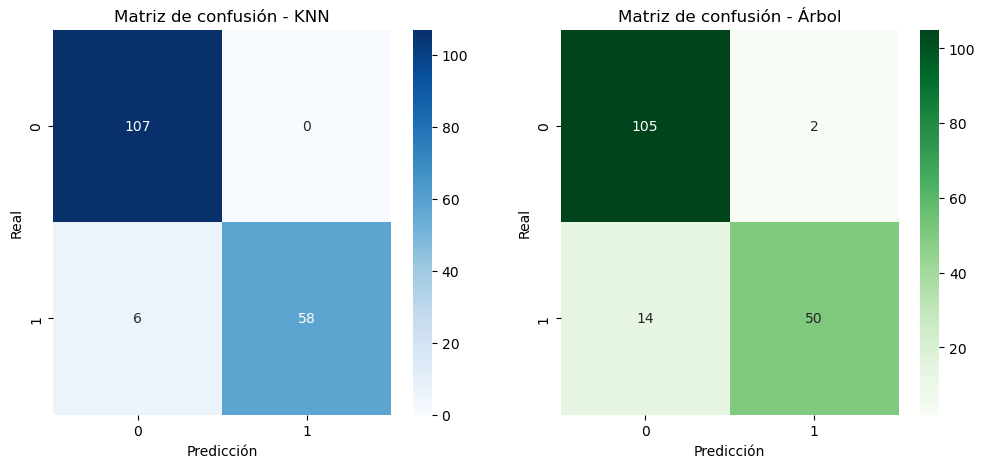

In [16]:
print("Resultados comparativos:")
print("KNN:", accuracy_score(y_test, y_pred_knn))
print("Árbol de Decisión:", accuracy_score(y_test, y_pred_tree))

# Matrices de confusión
fig, axes = plt.subplots(1,2, figsize=(12,5))
sns.heatmap(confusion_matrix(y_test, y_pred_knn), annot=True, fmt="d", cmap="Blues", ax=axes[0])
axes[0].set_title("Matriz de confusión - KNN")
axes[0].set_xlabel("Predicción")
axes[0].set_ylabel("Real")

sns.heatmap(confusion_matrix(y_test, y_pred_tree), annot=True, fmt="d", cmap="Greens", ax=axes[1])
axes[1].set_title("Matriz de confusión - Árbol")
axes[1].set_xlabel("Predicción")
axes[1].set_ylabel("Real")

plt.show()


# Conclusión

En este ejercicio aplicamos dos algoritmos de Aprendizaje Supervisado sobre el dataset Breast Cancer Wisconsin (Diagnostic): K-Nearest Neighbors (KNN) y Árboles de Decisión.

KNN mostró una alta precisión aprovechando la naturaleza numérica de las variables y la buena separación entre clases. Sin embargo, su desempeño depende fuertemente del valor de k y de la correcta estandarización de los datos.

Árboles de Decisión alcanzaron también una precisión competitiva, con la ventaja adicional de ofrecer interpretabilidad a través de las reglas generadas y la importancia de las variables. No obstante, son más propensos al sobreajuste si no se limita la profundidad.

En conclusión, KNN fue más robusto en términos de predicción, mientras que los Árboles de Decisión aportaron mayor claridad en la explicación de los resultados. La elección entre ambos dependerá del objetivo: si se busca precisión pura KNN es una buena opción, mientras que si se necesita interpretabilidad del modelo, el Árbol de Decisión es más adecuado.